In [428]:
import pandas as pd
import io
import requests
import sklearn
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
%pylab inline
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import seaborn as sns
#hide warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Assignment overview


You should implement five learning algorithms. They are for:

* Decision trees with some form of pruning

* Neural networks

* Boosting

* Support Vector Machines

* k-nearest neighbors

Each algorithm is described in detail in your textbook, the handouts, and all over the web. In fact, instead of implementing the algorithms yourself, you may (and by may I mean should) use software packages that you find elsewhere; however, if you do so you should provide proper attribution. Also, you will note that you have to do some fiddling to get good results, graphs and such, so even if you use another's package, you may need to be able to modify it in various ways.

Decision Trees. For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

Neural Networks. For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

Boosting. Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

Support Vector Machines. You should implement (for sufficently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

k-Nearest Neighbors. You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

Testing. In addition to implementing (wink), the algorithms described above, you should design two interesting classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples. I don't care where you get the data. You can download some, take some from your own research, or make some up on your own. Be careful about the data you choose, though. You'll have to explain why they are interesting, use them in later assignments, and come to really care about them.

---------------
What to Turn In
---------------

You must submit:

* a file named README.txt containing instructions for running your code (see note below)

* a file named yourgtaccount-analysis.pdf containing your writeup

Note below: if the data are way, way, too huge for submitting, see if you can arrange for an URL. This also goes for code, too. Submitting all of Weka isn't necessary, for example, because I can get it myself; however, you should at least submit any files you found necessary to change and enough support and explanation so we could reproduce your results if we really wanted to do so. In any case, include all the information in README.txt

The file yourgtaccount-analysis.pdf should contain:

* a description of your classification problems, and why you feel that they are interesting. Think hard about this. To be at all interesting the problems should be non-trivial on the one hand, but capable of admitting comparisons and analysis of the various algorithms on the other. 

* the training and testing error rates you obtained running the various learning algorithms on your problems. At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. Both of these kinds of graphs are referred to as learning curves, BTW.

* analyses of your results. Why did you get the results you did? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How fast were they in terms of wall clock time? Iterations? Would cross validation help (and if it would, why didn't you implement it?)? How much performance was due to the problems you chose? How about the values you chose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?)? Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can.

For the sanity of your graders, please keep your analysis as short as possible while still covering the requirements of the assignment: to facilitate this sanity, analysis writeup is limited to 12 pages.



----------------
Grading Criteria
----------------

You are being graded on your analysis more than anything else. Roughly speaking, implementing everything and getting it to run is worth maybe 0% of the grade on this assignment (I know you don't believe me, but in fact, steal the code; I not only don't care, I am encouraging you to use one of the many packages available both from the resources page and on the web). Of course, analysis without proof of working code makes the analysis suspect.

The key thing is that your explanations should be both thorough and concise. Imagine you are writing a paper for the major conference in your field the year you will be graduating and you need to impress all those folks who will be deciding whether to interview you later. You don't want them to think you're shallow do you? Or that you're incapable of coming up with interesting classification problems, right? And you surely don't want them to think that you make up for a lack of content by blathering on about irrelevant aspects of your work? Of course not.

Finally, I'd like to point out that I am very particular about the format of the assignments. Follow the directions carefully. Failure to turn in files with the proper naming scheme, or anything else that makes the graders' lives unduly hard is simply going to lead to an ignored assignment. I am remarkably inflexible about this. Also, there will be no late assignments accepted, so start now. Have fun. One day you'll look back on this and smile. There may be tears, but they will be tears of joy.

When your assignment is graded, you will receive feedback explaining your errors (and your successes!) in some

# Data set one

- Will an adult make more than $50? https://archive.ics.uci.edu/ml/datasets/Adult

In [73]:

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cross_validation_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
adult_data=requests.get(url).content
adult_data_validation = requests.get(cross_validation_url).content

- Features

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, - 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-- clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, - Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [78]:
cols =[ 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
          'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']

In [306]:
# adult_income_df = pd.read_csv(io.StringIO(adult_data.decode('utf-8')), names=cols)
# adult_income_validation_df = pd.read_csv(io.StringIO(adult_data_validation.decode('utf-8')), names=cols)

In [329]:
# #save as csv
#adult_income_df.to_csv('./data/adult_income.csv')
# adult_income_validation_df.to_csv('./data/adult_income_validation.csv')
adult_income_df = pd.read_csv('./data/adult_income.csv')

In [330]:
# If reading it in
adult_income_df.drop('Unnamed: 0', axis=1, inplace=True)

In [331]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [333]:
# transform income into more than 50k less than 50k
income_transformed =  adult_income_df['income_bracket'].apply(lambda x: 0 if x == ' <=50K' else 1)
adult_income_df['income_bracket'] =income_transformed

# Convert features to numerical features

In [335]:
def one_hot_text_encoder(df, text_cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'race']):
    for col in text_cols:
        # Get k-1 columns
        one_hot_df = pd.get_dummies(df[col], drop_first=True)
        df = df.drop(col, axis=1)
        df = pd.concat([df, one_hot_df], axis=1)
    return df
        
    

In [336]:
transformed_adult_income_df = one_hot_text_encoder(adult_income_df)



In [337]:
transformed_adult_income_df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_bracket', ' Federal-gov', ' Local-gov',
       ' Never-worked',
       ...
       ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' United-States',
       ' Vietnam', ' Yugoslavia', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object', length=101)

In [338]:
transformed_adult_income_df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_bracket', ' Federal-gov', ' Local-gov',
       ' Never-worked',
       ...
       ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' United-States',
       ' Vietnam', ' Yugoslavia', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object', length=101)

# EDA

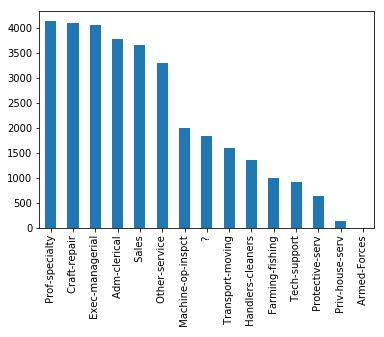

In [10]:
adult_income_df.occupation.value_counts().plot(kind='bar')

In [426]:
adult_income_df.income_bracket.value_counts()

0    24720
1     7841
Name: income_bracket, dtype: int64

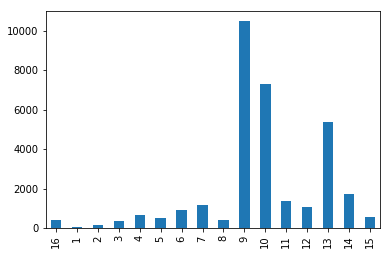

In [106]:
adult_income_df.education_num.value_counts(sort=False).plot(kind='bar')

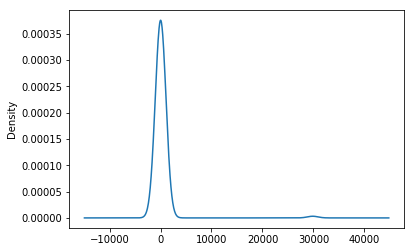

In [27]:
adult_income_df.capital_gain.value_counts(sort=False).plot(kind='kde')

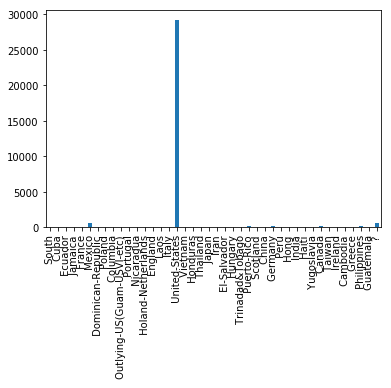

In [29]:
adult_income_df.native_country.value_counts(sort=False).plot(kind='bar')

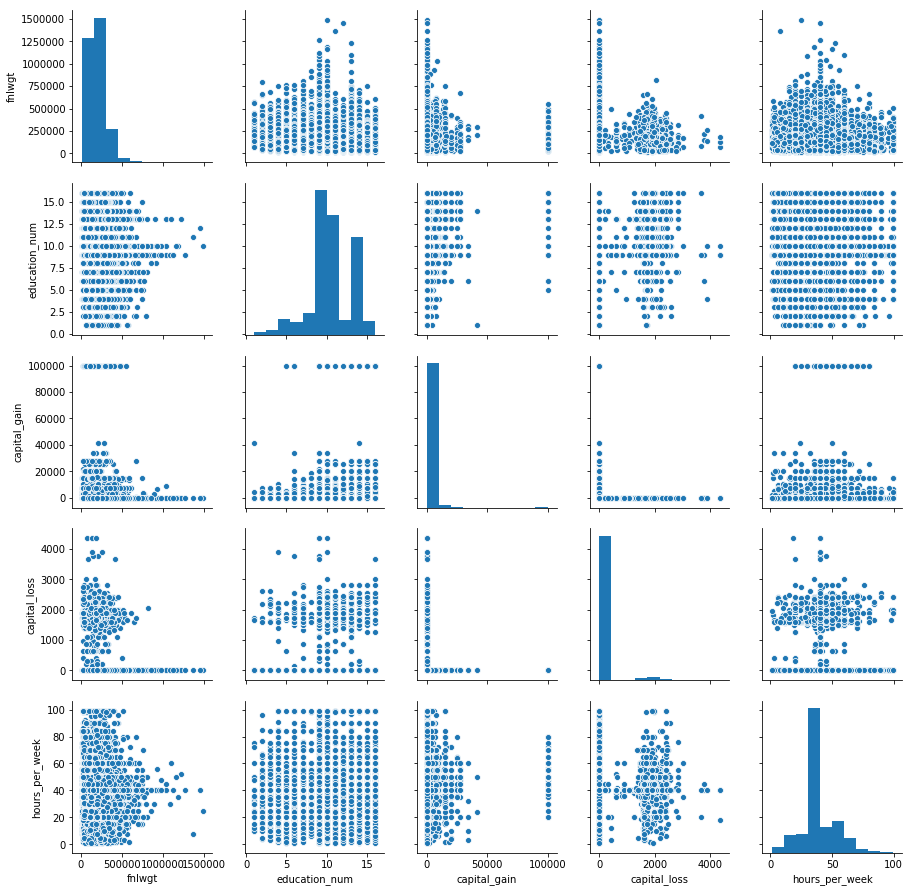

In [42]:
sns.pairplot(adult_income_df)

In [347]:
X_transformed_adult_income_df = transformed_adult_income_df.iloc[:, transformed_adult_income_df.columns != 'income_bracket']
Y_transformed_adult_income_df = transformed_adult_income_df['income_bracket']

# Is this data set balanced

In [294]:
transformed_adult_income_df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'transformed_workclass', ' Federal-gov', ' Local-gov',
       ' Never-worked',
       ...
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia', ' >50K', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object', length=102)

# Data Set Two - Will a client subscribe to a term depost?
- data: https://archive.ics.uci.edu/ml/datasets/bank+marketing
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 



 Input variables:
   - bank client data:
   - 1 - age (numeric)
   - 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - 5 - default: has credit in default? (categorical: "no","yes","unknown")
   - 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   - 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   - related with the last contact of the current campaign:
   - 8 - contact: contact communication type (categorical: "cellular","telephone") 
   - 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  - 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   - other attributes:
  - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   - social and economic context attributes
  - 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - 20 - nr.employed: number of employees - quarterly indicator (numeric)

  - Output variable (desired target):
  - 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [11]:
banking_df = pd.read_csv('data/bank-full.csv', delimiter =';')

In [12]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [341]:
# transform y into 1 and 0 
banking_df['y'] = banking_df['y'].apply(lambda x: 1 if x =='yes' else 0)

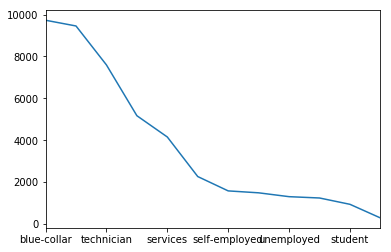

In [342]:
banking_df.job.value_counts().plot()


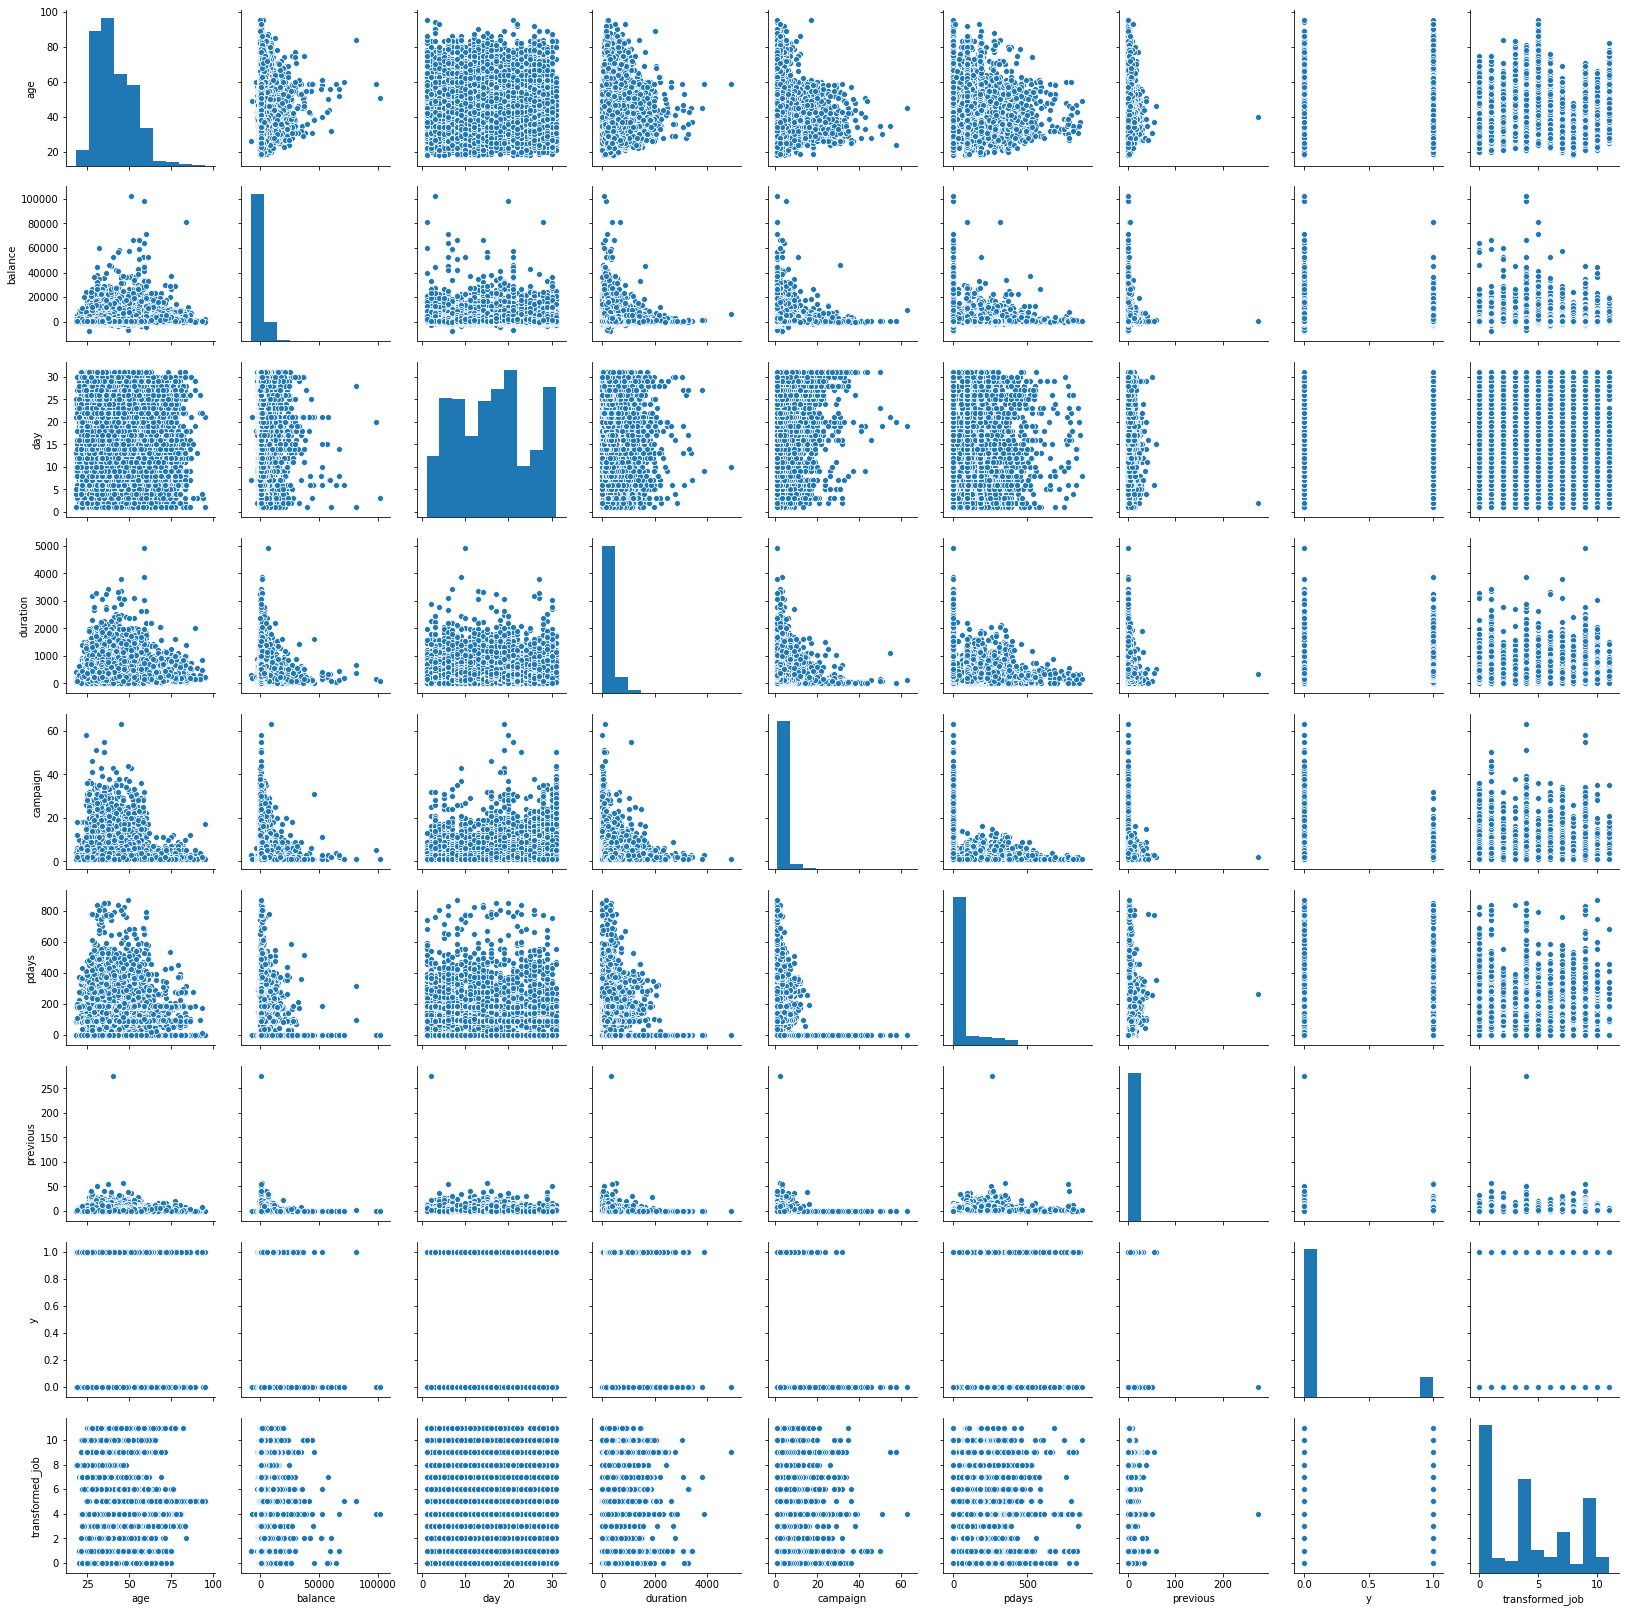

In [343]:
sns.pairplot(banking_df)

# Convert text features to label-encoded features

In [368]:
banking_text_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'default']

In [369]:
transformed_banking_df = one_hot_text_encoder(banking_df, banking_text_cols)

In [370]:
transformed_banking_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,transformed_job,blue-collar,...,jun,mar,may,nov,oct,sep,other,success,unknown,yes
0,58,2143,5,261,1,-1,0,0,4,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,9,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,2,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,11,0,...,0,0,1,0,0,0,0,0,1,0


In [371]:
X_transformed_banking_df = transformed_banking_df.iloc[:, transformed_banking_df.columns != 'y']
Y_transformed_banking_df = transformed_banking_df['y']

In [372]:
X_transformed_banking_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'transformed_job', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'married', 'single', 'secondary',
       'tertiary', 'unknown', 'yes', 'yes', 'telephone', 'unknown', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'other', 'success', 'unknown', 'yes'],
      dtype='object')

# Is the data set balanced?

In [427]:
transformed_banking_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
X_transformed_adult_income_df, Y_transformed_adult_income_df
X_transformed_banking_df, Y_transformed_banking_df

# Plot Learning Curves

In [460]:
# Taken from - https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.rcParams.update({'font.size': 12})
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label=str(cv) +"x Cross-validation testing score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/matplotlib/pyplot.py'>

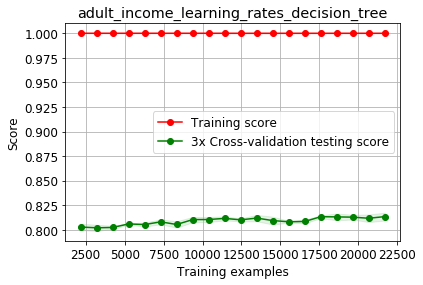

In [461]:
plot_learning_curve(DecisionTreeClassifier(), 'adult_income_learning_rates_decision_tree', 
                    X_transformed_adult_income_df, Y_transformed_adult_income_df)

<module 'matplotlib.pyplot' from '/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/matplotlib/pyplot.py'>

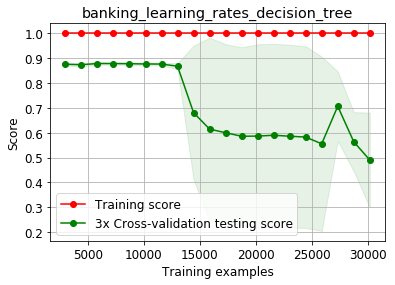

In [462]:
plot_learning_curve(DecisionTreeClassifier(), 'banking_learning_rates_decision_tree', 
                    X_transformed_banking_df, Y_transformed_banking_df)

# Decision Trees

In [79]:
X_transformed_banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age                      45211 non-null int64
balance                  45211 non-null int64
day                      45211 non-null int64
duration                 45211 non-null int64
campaign                 45211 non-null int64
pdays                    45211 non-null int64
previous                 45211 non-null int64
transformed_job          45211 non-null int64
transformed_marital      45211 non-null int64
transformed_education    45211 non-null int64
transformed_housing      45211 non-null int64
transformed_loan         45211 non-null int64
transformed_contact      45211 non-null int64
transformed_month        45211 non-null int64
transformed_poutcome     45211 non-null int64
transformed_default      45211 non-null int64
dtypes: int64(16)
memory usage: 5.5 MB


In [80]:
adult_trgX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 31375 to 13784
Data columns (total 14 columns):
age                           22792 non-null int64
fnlwgt                        22792 non-null int64
education_num                 22792 non-null int64
capital_gain                  22792 non-null int64
capital_loss                  22792 non-null int64
hours_per_week                22792 non-null int64
transformed_workclass         22792 non-null int64
transformed_education         22792 non-null int64
transformed_marital_status    22792 non-null int64
transformed_occupation        22792 non-null int64
transformed_relationship      22792 non-null int64
transformed_sex               22792 non-null int64
transformed_native_country    22792 non-null int64
transformed_race              22792 non-null int64
dtypes: int64(14)
memory usage: 2.6 MB


In [144]:
np.any(np.isnan(adult_tstX))

False

In [145]:
np.all(np.isfinite(adult_tstX))

True

In [388]:

rf_adult = RandomForestClassifier(n_jobs=-1)
rf_banking = RandomForestClassifier(n_jobs=-1)
scaler = StandardScaler()

adult_trgX, adult_tstX, adult_trgY, adult_tstY = ms.train_test_split(
    X_transformed_adult_income_df, Y_transformed_adult_income_df, test_size=0.1, random_state=0, 
    stratify=Y_transformed_adult_income_df)

banking_trgX, banking_tstX, banking_trgY, banking_tstY = ms.train_test_split(
    X_transformed_banking_df, Y_transformed_banking_df, test_size=0.1, random_state=0,stratify=Y_transformed_banking_df)     


# used for pruning 
min_samples_leaf_param = [i for i in range(1,10)]
max_depth = [i for i in range(1, 40, 2)]
# maximum depth of the tree , also for pruning

pipeA = Pipeline([('Scale',scaler),
                 ('DT', DecisionTreeClassifier())]) 


pipeB = Pipeline([('Scale',StandardScaler()),                 
                 ('DT',DecisionTreeClassifier())])


params = {'DT__criterion':['gini','entropy'],'DT__min_samples_leaf':min_samples_leaf_param, 'DT__max_depth':max_depth}


In [407]:
a_grid_search = GridSearchCV(pipeA, params, return_train_score=True, n_jobs = -1)
banking_grid_serach = GridSearchCV(pipeB, params, return_train_score=True, n_jobs=-1)

### Adult dataset gridsearch

In [408]:
a_grid_search.fit(adult_trgX, adult_trgY)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'DT__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [409]:
a_grid_search.best_params_

{'DT__criterion': 'entropy', 'DT__max_depth': 9, 'DT__min_samples_leaf': 3}

In [410]:
a_grid_search.best_score_

0.8555487305487306

In [418]:
# best parameters

In [414]:
best_adult_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3)

In [501]:
%timeit best_adult_decision_tree.fit(adult_trgX, adult_trgY)

82.3 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [455]:
adult_trgX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29304 entries, 31630 to 14197
Data columns (total 100 columns):
age                            29304 non-null int64
fnlwgt                         29304 non-null int64
education_num                  29304 non-null int64
capital_gain                   29304 non-null int64
capital_loss                   29304 non-null int64
hours_per_week                 29304 non-null int64
 Federal-gov                   29304 non-null uint8
 Local-gov                     29304 non-null uint8
 Never-worked                  29304 non-null uint8
 Private                       29304 non-null uint8
 Self-emp-inc                  29304 non-null uint8
 Self-emp-not-inc              29304 non-null uint8
 State-gov                     29304 non-null uint8
 Without-pay                   29304 non-null uint8
 11th                          29304 non-null uint8
 12th                          29304 non-null uint8
 1st-4th                       29304 non-null uint8
 5

In [503]:
adult_tstY.sum()

784

In [502]:
precision_recall_fscore_support(best_adult_decision_tree.predict(adult_tstX), adult_tstY)

(array([0.94985847, 0.55357143]),
 array([0.87032234, 0.77777778]),
 array([0.90835267, 0.64679583]),
 array([2699,  558]))

### Banking dataset gridsearch

In [507]:
banking_grid_serach.fit(banking_trgX, banking_trgY)

KeyboardInterrupt: 

In [412]:
banking_grid_serach.best_params_

{'DT__criterion': 'gini', 'DT__max_depth': 5, 'DT__min_samples_leaf': 4}

In [413]:
banking_grid_serach.best_score_

0.9012755290127553

- best params for banking dataset

In [508]:
best_banking_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4)

In [453]:
%timeit best_banking_decision_tree.fit(banking_trgX, banking_trgY)

90.7 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [509]:
best_banking_decision_tree.fit(banking_trgX, banking_trgY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [511]:
best_banking_decision_tree.classes_

array([0, 1])

In [510]:
precision_recall_fscore_support(best_banking_decision_tree.predict(banking_tstX), banking_tstY)

(array([0.97520661, 0.34404537]),
 array([0.91817967, 0.64768683]),
 array([0.94583435, 0.44938272]),
 array([4241,  281]))

In [485]:
def plot_tree_depth_versus_training_test_score_for_classifier(all_x, all_y, 
                                                              max_depth_iterations=[_ for _ in range(1,20,1)], 
                                                              cv_iterations=3, 
                                                              test_size=.30,
                                                              ):
    # Take in a classifier and return a dataframe of learning rate metrics
    
    depth = []
    training_scores = {}
    testing_scores = {}
    
    training_precision_scores = {}
    testing_precision_scores = {}
    
    training_recall_scores = {}
    testing_recall_scores = {}
    
    training_f1score_scores = {}
    testing_f1score_scores = {}
    
    training_mean_score = []
    testing_mean_score = []
    training_mean_precision = []
    testing_mean_precision = []
    training_mean_recall= [] 
    testing_mean_recall = []
    training_mean_f1score = []
    testing_mean_f1score = []
    
    counter = 0
    for depth in max_depth_iterations:
        print(f"Depth={depth}")
        for cv in range(cv_iterations):
            trgX, tstX, trgY, tstY = train_test_split(
                all_x, all_y, test_size=test_size, random_state=0
            )
            
            pipe = Pipeline([('Scale',scaler),
                     ('DT', RandomForestClassifier(n_jobs=-1, max_depth=depth))]) 
            pipe.fit(trgX, trgY)
            
            training_predictions = pipe.predict(trgX)
            testing_predictions = pipe.predict(tstX)

            if cv == 0:
                training_scores[depth] = [accuracy_score(training_predictions, trgY)]
                testing_scores[depth] = [accuracy_score(testing_predictions, tstY)]
                
                precision_train, recall_train, fscore_train, support_train = precision_recall_fscore_support(training_predictions, trgY)
                precision_test, recall_test, fscore_test, support_test = precision_recall_fscore_support(testing_predictions, tstY)
                # precisiion recall f1score
                training_precision_scores[depth] = [precision_train]
                training_recall_scores[depth] = [recall_train]
                training_f1score_scores[depth] = [fscore_train]
                
                testing_precision_scores[depth] = [precision_test]
                testing_recall_scores[depth] = [recall_test]
                testing_f1score_scores[depth] = [fscore_test]
                
                
            elif cv < cv_iterations-1:
                training_scores[depth].append(accuracy_score(training_predictions, trgY))
                testing_scores[depth].append(accuracy_score(testing_predictions, tstY))
                
                precision_train, recall_train, fscore_train, support_train = precision_recall_fscore_support(training_predictions, trgY)
                precision_test, recall_test, fscore_test, support_test = precision_recall_fscore_support(testing_predictions, tstY)
                
                testing_precision_scores[depth].append(precision_test)
                testing_recall_scores[depth].append(recall_test)
                testing_f1score_scores[depth].append(fscore_test)
                
                training_precision_scores[depth].append(precision_train)
                training_recall_scores[depth].append(recall_train)
                training_f1score_scores[depth].append(fscore_train)
                
            else:
                training_scores[depth].append(accuracy_score(training_predictions, trgY))
                testing_scores[depth].append(accuracy_score(testing_predictions, tstY))
                
                precision_train, recall_train, fscore_train, support_train = precision_recall_fscore_support(training_predictions, trgY)
                precision_test, recall_test, fscore_test, support_test = precision_recall_fscore_support(testing_predictions, tstY)
                
                testing_precision_scores[depth].append(precision_test)
                testing_recall_scores[depth].append(recall_test)
                testing_f1score_scores[depth].append(fscore_test)
                
                training_precision_scores[depth].append(precision_train)
                training_recall_scores[depth].append(recall_train)
                training_f1score_scores[depth].append(fscore_train)
                # add the mean scores
                
                training_mean_score.append(np.mean(training_scores[depth]))
                testing_mean_score.append(np.mean(testing_scores[depth]))
                
                training_mean_precision.append(np.mean(training_precision_scores[depth]))
                testing_mean_precision.append(np.mean(testing_precision_scores[depth]))
                
                training_mean_recall.append(np.mean(training_recall_scores[depth]))
                testing_mean_recall.append(np.mean(testing_recall_scores[depth]))
                
                training_mean_f1score.append(np.mean(training_f1score_scores[depth]))
                testing_mean_f1score.append(np.mean(testing_f1score_scores[depth]))
                
                
            
    results_df = pd.DataFrame.from_dict({
        'depth':max_depth_iterations,
        'training_cv_{}x_score'.format(cv_iterations): training_mean_score,
        'testing_cv_{}x_score'.format(cv_iterations): testing_mean_score,
        'training_cv_{}x_mean_precision'.format(cv_iterations): training_mean_precision,
        'testing_cv_{}x_mean_precision'.format(cv_iterations): testing_mean_precision,
        'training_cv_{}x_mean_recall'.format(cv_iterations) : training_mean_recall,
        'testing_cv_{}x_mean_recall'.format(cv_iterations): testing_mean_recall,
        'training_cv_{}x_mean_f1score'.format(cv_iterations) : training_mean_f1score,
        'testing_cv_{}x_mean_f1score'.format(cv_iterations): testing_mean_f1score}
    )
    return results_df
        
    
    

In [486]:
adult_pruning_results_df = plot_tree_depth_versus_training_test_score_for_classifier(X_transformed_adult_income_df, 
                                                                      Y_transformed_adult_income_df)

Depth=1
Depth=2
Depth=3
Depth=4
Depth=5
Depth=6
Depth=7
Depth=8
Depth=9
Depth=10
Depth=11
Depth=12
Depth=13
Depth=14
Depth=15
Depth=16
Depth=17
Depth=18
Depth=19


In [487]:
adult_pruning_results_df.head()

,depth,training_cv_3x_score,testing_cv_3x_score,training_cv_3x_mean_precision,testing_cv_3x_mean_precision,training_cv_3x_mean_recall,testing_cv_3x_mean_recall,training_cv_3x_mean_f1score,testing_cv_3x_mean_f1score
0,1,0.759945,0.758556,0.500700,0.500706,0.546599,0.545904,0.433168,0.432730
1,2,0.760004,0.758488,0.500821,0.500564,0.546621,0.545878,0.433423,0.432433
2,3,0.793977,0.791688,0.574646,0.572826,0.868784,0.861588,0.568474,0.564572
3,4,0.828800,0.829256,0.661483,0.664788,0.848425,0.848627,0.691994,0.695560
4,5,0.832836,0.830962,0.677197,0.675429,0.839100,0.837892,0.708446,0.705951


# Adult Dataset

Text(0, 0.5, 'Percent')

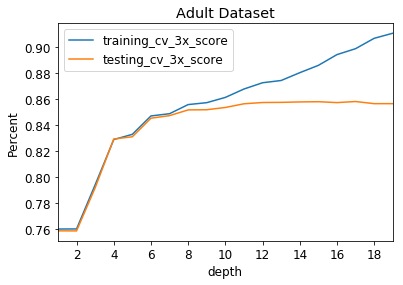

In [488]:
adult_pruning_results_df.plot(x='depth', y=['training_cv_3x_score','testing_cv_3x_score'], kind='line' )
plt.title('Adult Dataset')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

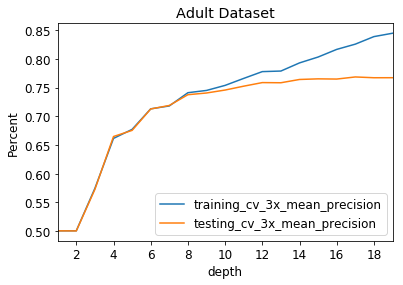

In [490]:
adult_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_precision','testing_cv_3x_mean_precision'], kind='line' )
plt.title('Adult Dataset')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

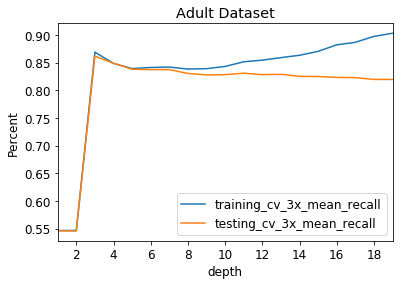

In [493]:
adult_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_recall','testing_cv_3x_mean_recall'], kind='line' )
plt.title('Adult Dataset')
plt.ylabel('Percent')

In [494]:
max(adult_pruning_results_df.testing_cv_3x_mean_f1score)

0.7896012029496835

Text(0, 0.5, 'Percent')

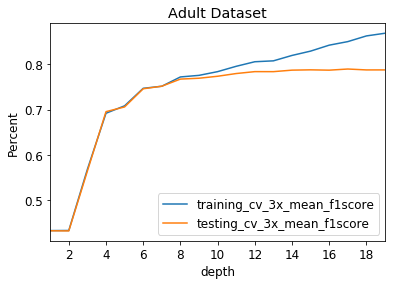

In [495]:
adult_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_f1score','testing_cv_3x_mean_f1score'], kind='line' )
plt.title('Adult Dataset')
plt.ylabel('Percent')

 # Banking Dataset

In [496]:
banking_pruning_results_df = plot_tree_depth_versus_training_test_score_for_classifier(X_transformed_banking_df, 
                                                                      Y_transformed_banking_df)

Depth=1
Depth=2
Depth=3
Depth=4
Depth=5
Depth=6
Depth=7
Depth=8
Depth=9
Depth=10
Depth=11
Depth=12
Depth=13
Depth=14
Depth=15
Depth=16
Depth=17
Depth=18
Depth=19


Text(0, 0.5, 'Percent')

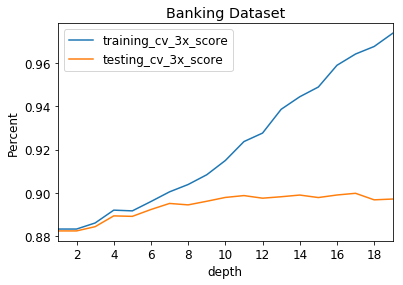

In [497]:
banking_pruning_results_df.plot(x='depth', y=['training_cv_3x_score','testing_cv_3x_score'], kind='line' )
plt.title('Banking Dataset')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

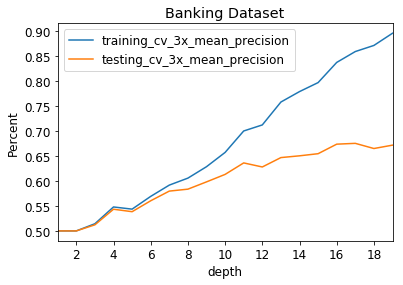

In [498]:
banking_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_precision','testing_cv_3x_mean_precision'], kind='line' )
plt.title('Banking Dataset')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

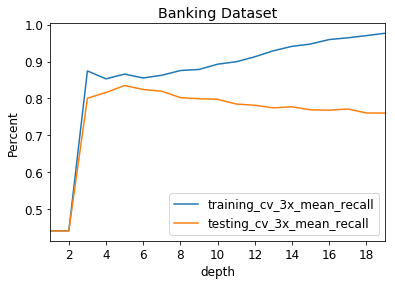

In [499]:
banking_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_recall','testing_cv_3x_mean_recall'], kind='line' )
plt.title('Banking Dataset')
plt.ylabel('Percent')

In [500]:
max(banking_pruning_results_df.testing_cv_10x_mean_f1score)

AttributeError: 'DataFrame' object has no attribute 'testing_cv_10x_mean_f1score'

In [ ]:
banking_pruning_results_df.plot(x='depth', y=['training_cv_3x_mean_f1score','testing_cv_3x_mean_f1score'], kind='line' )
plt.title('Banking Dataset')
plt.ylabel('Percent')

# Confusion Matrix

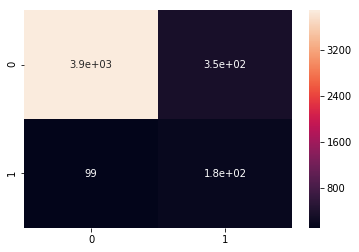

In [431]:
sns.heatmap(confusion_matrix(best_banking_decision_tree.predict(banking_tstX), banking_tstY), annot=True)

In [450]:
def cm_analysis(y_true, y_pred, labels, plot_title, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(plot_title)
    plt.rcParams.update({'font.size': 22})
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

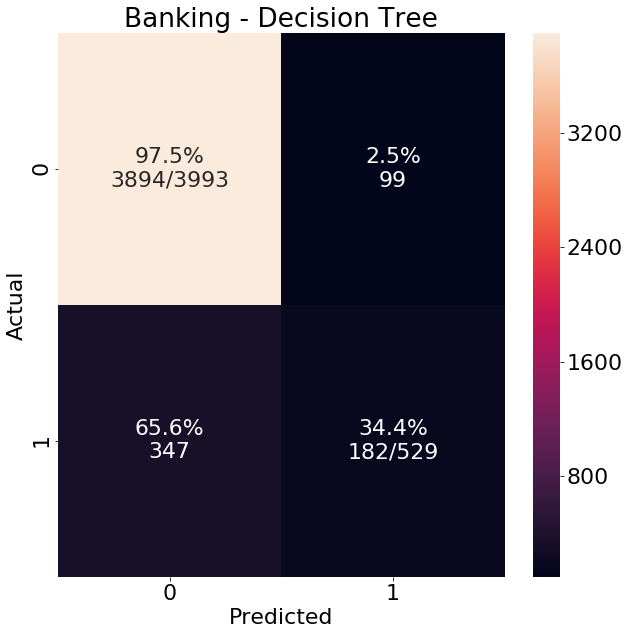

In [451]:
cm_analysis(banking_tstY, best_banking_decision_tree.predict(banking_tstX), best_banking_decision_tree.classes_, 'Banking - Decision Tree')


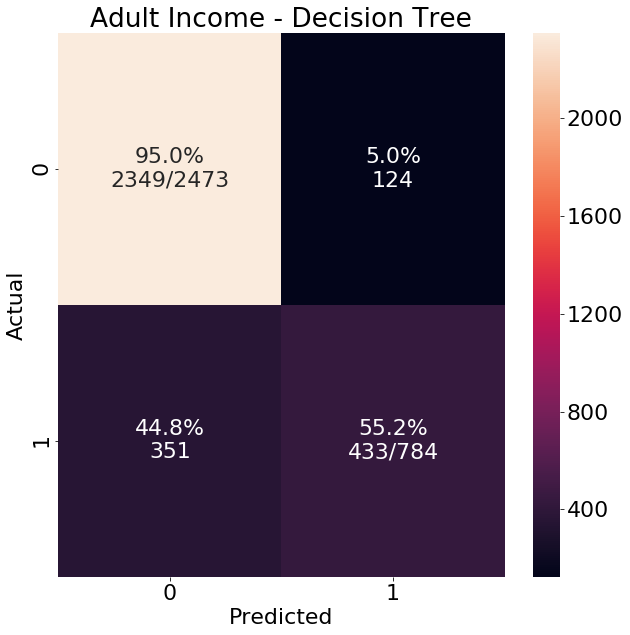

In [449]:
cm_analysis(adult_tstY, best_adult_decision_tree.predict(adult_tstX), best_adult_decision_tree.classes_, 'Adult Income - Decision Tree')
